In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
data_class1 = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class1train_data.npy')
data_class2 = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class2train_data.npy')
data_class3 = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class3train_data.npy')
data_test1   = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class1test_data.npy')
data_test2   = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class2test_data.npy')
data_test3   = np.load('/content/drive/MyDrive/Assignment1_CS669/Group01_Assignment1_code/Group01/rd_group1/class3test_data.npy')
data = []


In [ ]:
def func_G(x,cov, mean,p=1/3):
    inv_cov = np.linalg.pinv(cov)
    g = -0.5*np.matmul(np.matmul((x-mean),(inv_cov)),((x-mean).T))+0.5*(np.log(np.linalg.det(cov)))+np.log(p)
    if(isinstance(g,np.ndarray)):
        return g.diagonal()
    else:
        return g

In [ ]:
def find_mean(data):
    return [np.sum(data[:,0])/data.shape[0],np.sum(data[:,1])/data.shape[0]]

def find_covariance(data, mean):
    a = []
    varx = (np.sum(data[:,0]**2)/data.shape[0])-(mean[0]**2)
    vary = (np.sum(data[:,1]**2)/data.shape[0])-(mean[1]**2)
    varxy = (np.sum(data[:,0]*data[:,1])/data.shape[0])-(mean[0]*mean[1])
    a = [[varx,varxy],[varxy,vary]]
    a = np.array(a)

    return a

In [ ]:
def get_confusion_mat(classes, il=None,jl=None, kl=None):

    lis = []
    if((il != None) and (jl!=None) and (kl!=None)):
        conf_mat = np.full((3,3),1e-10)
        for i in range(data_test1.shape[0]):
            lis.append(0)
        for i in range(data_test2.shape[0]):
            lis.append(1)
        for i in range(data_test3.shape[0]):
            lis.append(2)
        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1
        return np.array(conf_mat)
    else:
        conf_mat = np.full((2,2),1e-10)
        if(il==1 and jl==2):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test2.shape[0]):
                lis.append(1)
        if(il==1 and jl==3):
            for i in range(data_test1.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)
        if(il==2 and jl==3):
            for i in range(data_test2.shape[0]):
                lis.append(0)
            for i in range(data_test3.shape[0]):
                lis.append(1)

        for i in range(len(classes)):
            conf_mat[lis[i]][classes[i]]+=1

        return np.array(conf_mat)

In [ ]:
def metric(conf_matrix):
    x = conf_matrix.shape[0]
    precision = []
    accuracy = []
    recall = []
    f_measure = []
    total_sum = np.sum(conf_matrix)
    for i in range(x):
        TP = conf_matrix[i][i]
        FN = np.sum(conf_matrix[i,:])-conf_matrix[i][i]
        FP = np.sum(conf_matrix[:,i])-conf_matrix[i][i]
        TN = total_sum-(TP+FP+FN)

        recal = TP/(TP+FN)
        preci = TP/(TP+FP)
        acc = (TP+TN)/(TP+TN+FP+FN)

        precision.append(preci)
        recall.append(recal)
        accuracy.append(acc)
        f_measure.append((2*recal*preci)/(recal+preci))

    return accuracy,precision,recall,f_measure

In [ ]:
def find_range(data1, data2, data3):

    minx = np.min(data1[:,0])
    minx = min(minx, np.min(data2[:,0]))
    minx = min(minx, np.min(data3[:,0]))

    miny = np.min(data1[:,1])
    miny = min(miny, np.min(data2[:,1]))
    miny = min(miny, np.min(data3[:,1]))

    maxx = np.max(data1[:,0])
    maxx = max(maxx, np.max(data2[:,0]))
    maxx = max(maxx, np.max(data3[:,0]))

    maxy = np.min(data1[:,1])
    maxy = max(maxy, np.max(data2[:,1]))
    maxy = max(maxy, np.max(data3[:,1]))
    scalex = maxx-minx
    scaley = maxy-miny
    return minx-5, miny-5, maxx+5, maxy+5
minx, miny, maxx,maxy = find_range(data_class1, data_class2, data_class3)

In [ ]:
def pair_plot(dc1, dc2,cov1, cov2, mean1, mean2, il, jl):
    dat_blue = []
    dat_red = []
    dict_={1:'violet',2:'pink',3:'oldlace'}
    dict_2 = {3:'red',1:'blue',2:'green'}
    patch1 = mpatches.Patch(color=dict_[il], label='class{}'.format(il))
    patch2 = mpatches.Patch(color=dict_[jl], label='class{}'.format(jl))
    for i in progressbar.progressbar(np.arange(minx,maxx,1)):
        for j in np.arange(miny,maxy,1):
            data=[]
            data.append([i,j])
            data=np.array(data)
            g1 = func_G(data,cov1,mean1)
            g2 = func_G(data,cov2,mean2)
            if(np.argmax([g1,g2])==0):
                dat_red.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2])==1):
                dat_blue.append([data[0][0],data[0][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    fig, ax = plt.subplots()
#     ax = sns.kdeplot(dc1[:,0], dc1[:,1])
#     ax = sns.kdeplot(dc2[:,0], dc2[:,1])
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c=dict_[jl])
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c=dict_[il])
    ax = plt.legend(handles=[patch2,patch1])
    ax = plt.scatter(dc1[:,0], dc1[:,1], s=2, c=dict_2[il])
    ax = plt.scatter(dc2[:,0], dc2[:,1], s=2, c=dict_2[jl])
    plt.show()

    data_test = []
    if(il==1 or jl==1):
        for i in range(data_test1.shape[0]):
            data_test.append([data_test1[i][0],data_test1[i][1]])
    if(il==2 or jl==2):
        for i in range(data_test2.shape[0]):
            data_test.append([data_test2[i][0],data_test2[i][1]])
    if(il==3 or jl==3):
        for i in range(data_test3.shape[0]):
            data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)
    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i]]))

    conf_mat = get_confusion_mat(classes, il,jl)
    print("Confusion Matrix")
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))

def total_plot(cov1, cov2, cov3, mean1, mean2, mean3):

    dat_blue = []
    dat_red = []
    dat_green = []
    violet_patch = mpatches.Patch(color='violet', label='class1')
    pink_patch = mpatches.Patch(color='pink', label='class2')
    oldlace_patch = mpatches.Patch(color='oldlace', label='class3')
    for i in np.arange(minx,maxx,1):
        for j in np.arange(miny,maxy,1):
            data=[]
            data.append([i,j])
            data=np.array(data)
            g1 = func_G(data,cov1,mean1)
            g2 = func_G(data,cov2,mean2)
            g3 = func_G(data,cov3,mean3)
            if(np.argmax([g1,g2,g3])==0):
                dat_red.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2,g3])==1):
                dat_blue.append([data[0][0],data[0][1]])
            elif(np.argmax([g1,g2,g3])==2):
                dat_green.append([data[0][0],data[0][1]])

    dat_blue = np.array(dat_blue)
    dat_red = np.array(dat_red)
    dat_green = np.array(dat_green)

    fig, ax = plt.subplots()
    ax = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    ax = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    ax = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()


    minx1 = (mean1[0])-10
    miny1 = (mean1[1])-10
    maxx1 = (mean1[0])+10
    maxy1 = (mean1[1])+10

    minx2 = (mean2[0])-10
    miny2 = (mean2[1])-10
    maxx2 = (mean2[0])+10
    maxy2 = (mean2[1])+10

    minx3 = (mean3[0])-10
    miny3 = (mean3[1])-10
    maxx3 = (mean3[0])+10
    maxy3 = (mean3[1])+10



    x1 = np.linspace(minx1,maxx1,500)
    y1 = np.linspace(miny1,maxy1,500)
    n1 = 500
    Z1 = np.ndarray(shape=(n1,n1),dtype=float)
    for i in range(n1):
        for j in range(n1):
            P = [[x1[i],y1[j]]]
            P = np.array(P)
            g = func_G(P,cov1,mean1)
            Z1[j][i]=np.e**g[0]
    X1, Y1 = np.meshgrid(x1,y1)

    x2 = np.linspace(minx2,maxx2,500)
    y2 = np.linspace(miny2,maxy2,500)
    n2 = 500
    Z2 = np.ndarray(shape=(n2,n2),dtype=float)
    print(cov1)
    for i in range(n2):
        for j in range(n2):
            P = [[x2[i],y2[j]]]
            P = np.array(P)
            g = func_G(P,cov2,mean2)
            Z2[j][i]=np.e**g[0]
    X2, Y2 = np.meshgrid(x2,y2)

    x3 = np.linspace(minx3,maxx3,500)
    y3 = np.linspace(miny3,maxy3,500)
    n3 = 500
    Z3 = np.ndarray(shape=(n3,n3),dtype=float)
    print(cov2)
    for i in range(n3):
        for j in range(n3):
            P = [[x3[i],y3[j]]]
            P = np.array(P)
            g = func_G(P,cov3,mean3)
            Z3[j][i]=np.e**g[0]
    X3, Y3 = np.meshgrid(x3,y3)

    fig3, ax3 = plt.subplots()
    ax3 = plt.contour(X1, Y1, Z1, colors='black')
    ax3 = plt.contour(X2, Y2, Z2, colors='pink')
    ax3 = plt.contour(X3, Y3, Z3, colors='orange')
    ax3 = plt.scatter(dat_blue[:,0], dat_blue[:,1], s=2, c='pink')
    ax3 = plt.scatter(dat_red[:,0], dat_red[:,1], s=2, c='violet')
    ax3 = plt.scatter(dat_green[:,0], dat_green[:,1], s=2, c='oldlace')
    ax3 = plt.legend(handles=[violet_patch,pink_patch,oldlace_patch])
    ax3 = plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
    ax3 = plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
    ax3 = plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
    plt.show()

    data_test = []
    for i in range(data_test1.shape[0]):
        data_test.append([data_test1[i][0],data_test1[i][1]])
    for i in range(data_test2.shape[0]):
        data_test.append([data_test2[i][0],data_test2[i][1]])
    for i in range(data_test3.shape[0]):
        data_test.append([data_test3[i][0],data_test3[i][1]])

    data_test = np.array(data_test)

    g1 = func_G(data_test, cov1, mean1)
    g2 = func_G(data_test, cov2, mean2)
    g3 = func_G(data_test, cov3, mean3)


    classes = []
    for i in range(data_test.shape[0]):
        classes.append(np.argmax([g1[i],g2[i],g3[i]]))

    conf_mat = get_confusion_mat(classes,1,2,3)
    print(conf_mat)
    temp = np.array(metric(conf_mat))
    print("Accuracy: ",temp[0,:])
    print("Precision: ",temp[1,:])
    print("Recall: ",temp[2,:])
    print("F-Measure: ",temp[3,:])
    print("Mean F-Measure: ",np.mean(temp[3,:]))


In [ ]:

data_test = []
for i in range(data_test1.shape[0]):
    data_test.append([data_test1[i][0],data_test1[i][1]])
for i in range(data_test2.shape[0]):
    data_test.append([data_test2[i][0],data_test2[i][1]])
for i in range(data_test3.shape[0]):
    data_test.append([data_test3[i][0],data_test3[i][1]])

data_test = np.array(data_test)

In [ ]:


mean1 = find_mean(data_class1)
mean2 = find_mean(data_class2)
mean3 = find_mean(data_class3)

cov1 = find_covariance(data_class1, mean1)
cov2 = find_covariance(data_class2, mean2)
cov3 = find_covariance(data_class3, mean3)

100% (2085 of 2085) |####################| Elapsed Time: 0:15:04 Time:  0:15:04
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


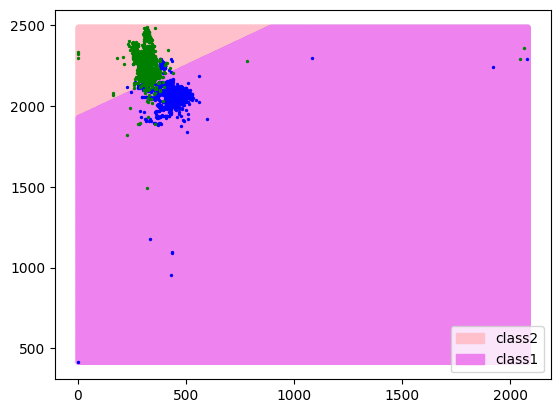

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[340. 348.]
 [ 27. 690.]]
Accuracy:  [0.73309609 0.73309609]
Precision:  [0.92643052 0.66473988]
Recall:  [0.49418605 0.9623431 ]
F-Measure:  [0.64454976 0.78632479]
Mean F-Measure:  0.7154372746789207


100% (2085 of 2085) |####################| Elapsed Time: 0:13:40 Time:  0:13:40


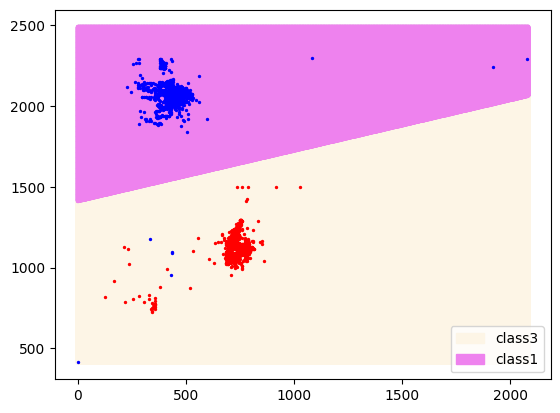

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[668.  20.]
 [  1. 649.]]
Accuracy:  [0.98430493 0.98430493]
Precision:  [0.99850523 0.97010463]
Recall:  [0.97093023 0.99846154]
F-Measure:  [0.98452469 0.98407885]
Mean F-Measure:  0.9843017672103376


100% (2085 of 2085) |####################| Elapsed Time: 0:13:31 Time:  0:13:31


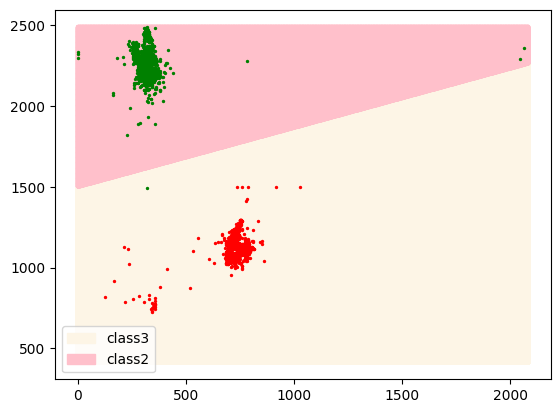

Confusion Matrix
[[7.09e+02 8.00e+00]
 [1.00e-10 6.50e+02]]
Accuracy:  [0.99414777 0.99414777]
Precision:  [1.         0.98784195]
Recall:  [0.9888424 1.       ]
F-Measure:  [0.9943899  0.99388379]
Mean F-Measure:  0.9941368469359609


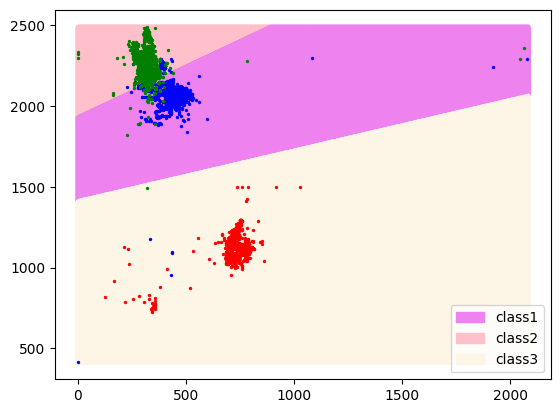

[[5957.717026935607, 0], [0, 5957.717026935607]]
[[5957.717026935607, 0], [0, 5957.717026935607]]


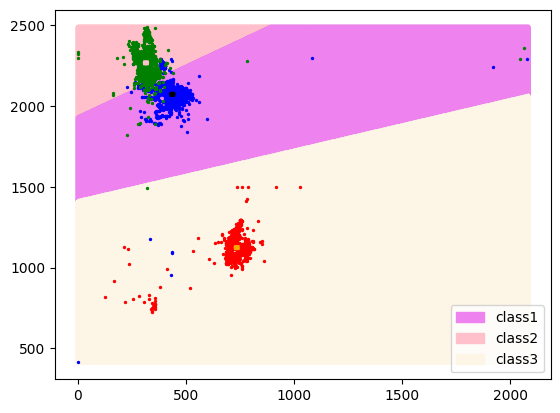

[[3.20e+02 3.48e+02 2.00e+01]
 [2.30e+01 6.90e+02 4.00e+00]
 [1.00e+00 1.00e-10 6.49e+02]]
Accuracy:  [0.80924574 0.81751825 0.98783455]
Precision:  [0.93023256 0.66473988 0.96433878]
Recall:  [0.46511628 0.9623431  0.99846154]
F-Measure:  [0.62015504 0.78632479 0.98110355]
Mean F-Measure:  0.7958611258719949


In [ ]:
#Case1: When all class have same diagonal covariance matrix
var_avg = (cov1[0][0]+cov2[0][0]+cov3[0][0]+cov1[1][1]+cov2[1][1]+cov3[1][1])/6
cov_new = [[var_avg,0],
           [0,var_avg]]


pair_plot(data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov_new, cov_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov_new, cov_new, mean2, mean3,2,3)

total_plot(cov_new, cov_new, cov_new, mean1, mean2, mean3)

100% (2085 of 2085) |####################| Elapsed Time: 0:14:49 Time:  0:14:49


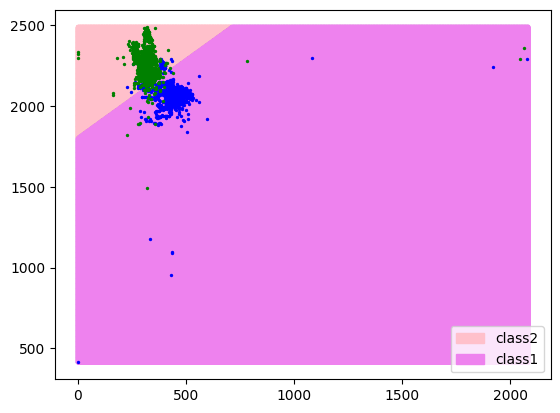

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[341. 347.]
 [ 26. 691.]]
Accuracy:  [0.73451957 0.73451957]
Precision:  [0.92915531 0.66570328]
Recall:  [0.49563953 0.9637378 ]
F-Measure:  [0.6464455  0.78746439]
Mean F-Measure:  0.7169549425472991


100% (2085 of 2085) |####################| Elapsed Time: 0:13:26 Time:  0:13:26


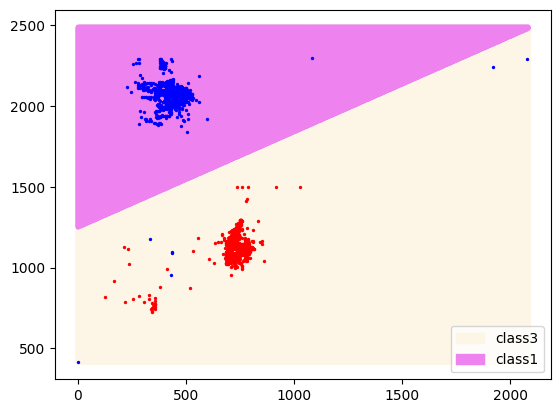

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[667.  21.]
 [  1. 649.]]
Accuracy:  [0.98355755 0.98355755]
Precision:  [0.99850299 0.96865672]
Recall:  [0.96947674 0.99846154]
F-Measure:  [0.98377581 0.98333333]
Mean F-Measure:  0.9835545722712418


100% (2085 of 2085) |####################| Elapsed Time: 0:13:42 Time:  0:13:42


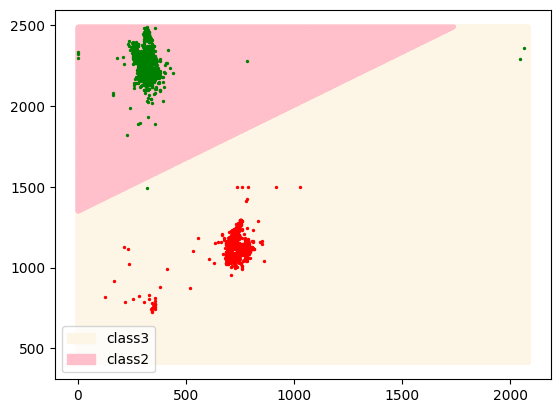

Confusion Matrix
[[700.  17.]
 [  1. 649.]]
Accuracy:  [0.98683248 0.98683248]
Precision:  [0.99857347 0.97447447]
Recall:  [0.9762901  0.99846154]
F-Measure:  [0.98730606 0.98632219]
Mean F-Measure:  0.9868141266648377


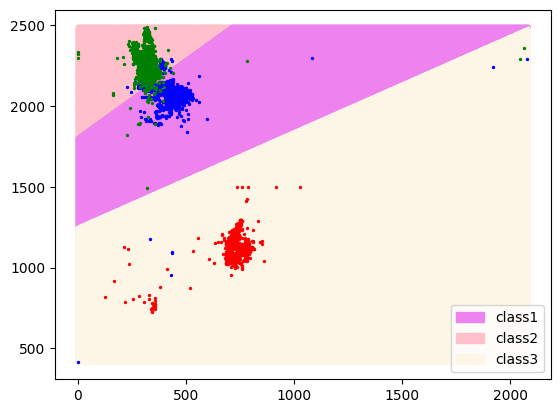

[[4918.16995722  878.91011661]
 [ 878.91011661 6997.26409665]]
[[4918.16995722  878.91011661]
 [ 878.91011661 6997.26409665]]


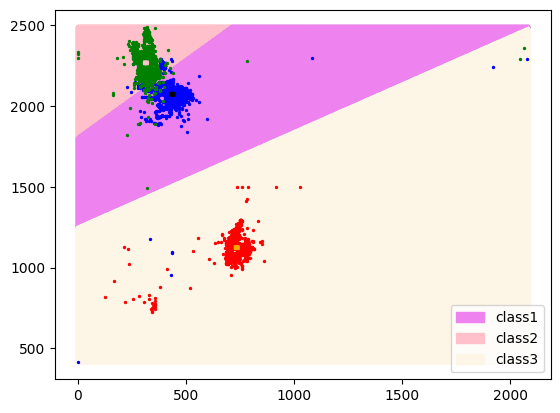

[[3.20e+02 3.47e+02 2.10e+01]
 [1.30e+01 6.91e+02 1.30e+01]
 [1.00e+00 1.00e-10 6.49e+02]]
Accuracy:  [0.81411192 0.81849148 0.98296837]
Precision:  [0.95808383 0.66570328 0.95021962]
Recall:  [0.46511628 0.9637378  0.99846154]
F-Measure:  [0.62622309 0.78746439 0.97374344]
Mean F-Measure:  0.7958103050997511


In [ ]:
#Case2: When all class have same covariance matrix

cov_new = np.add(np.add(cov1,cov2),cov3)/3

pair_plot(data_class1, data_class2, cov_new, cov_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov_new, cov_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov_new, cov_new, mean2, mean3,2,3)

total_plot(cov_new, cov_new, cov_new, mean1, mean2, mean3)

100% (2085 of 2085) |####################| Elapsed Time: 0:14:27 Time:  0:14:27


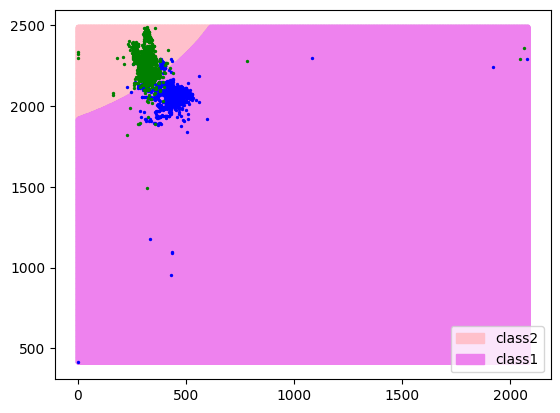

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[354. 334.]
 [ 27. 690.]]
Accuracy:  [0.7430605 0.7430605]
Precision:  [0.92913386 0.67382812]
Recall:  [0.51453488 0.9623431 ]
F-Measure:  [0.66230122 0.7926479 ]
Mean F-Measure:  0.7274745597967045


100% (2085 of 2085) |####################| Elapsed Time: 0:13:44 Time:  0:13:44


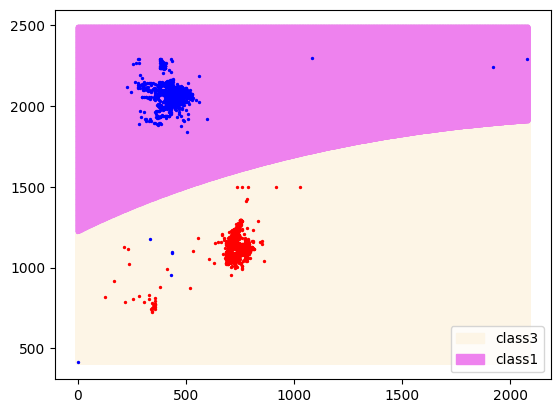

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[671.  17.]
 [  1. 649.]]
Accuracy:  [0.98654709 0.98654709]
Precision:  [0.9985119  0.97447447]
Recall:  [0.9752907  0.99846154]
F-Measure:  [0.98676471 0.98632219]
Mean F-Measure:  0.9865434471659549


100% (2085 of 2085) |####################| Elapsed Time: 0:12:48 Time:  0:12:48


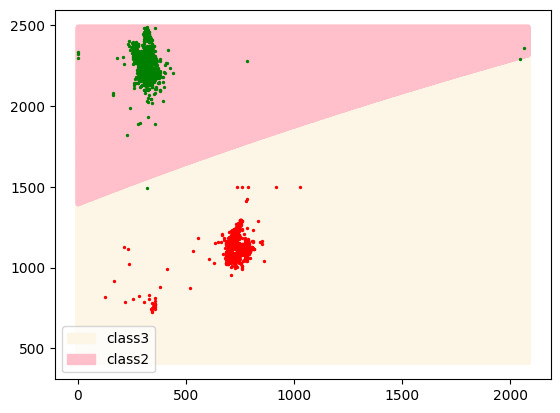

Confusion Matrix
[[709.   8.]
 [  1. 649.]]
Accuracy:  [0.99341624 0.99341624]
Precision:  [0.99859155 0.98782344]
Recall:  [0.9888424  0.99846154]
F-Measure:  [0.99369306 0.993114  ]
Mean F-Measure:  0.993403531949269


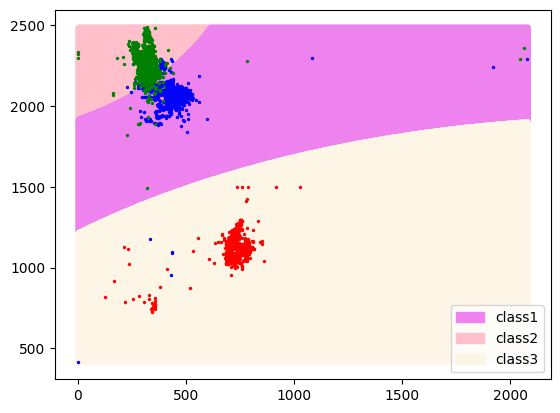

[[5367.78145949    0.        ]
 [   0.         8648.63691904]]
[[4761.7703728     0.        ]
 [   0.         6923.02142354]]


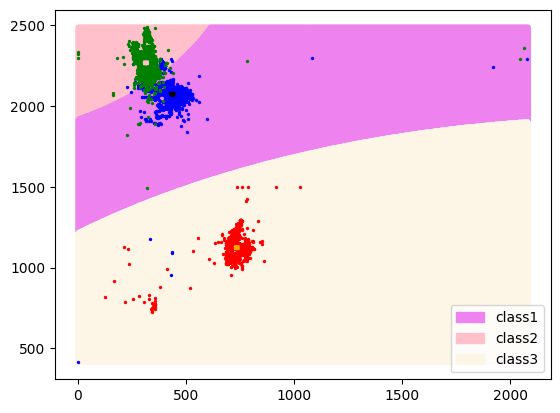

[[3.37e+02 3.34e+02 1.70e+01]
 [2.30e+01 6.90e+02 4.00e+00]
 [1.00e+00 1.00e-10 6.49e+02]]
Accuracy:  [0.81751825 0.8243309  0.9892944 ]
Precision:  [0.93351801 0.67382812 0.96865672]
Recall:  [0.48982558 0.9623431  0.99846154]
F-Measure:  [0.64251668 0.7926479  0.98333333]
Mean F-Measure:  0.8061659731304167


In [ ]:
#Case3: When all class have different covariance matrix but diagonal
cov1_new = np.copy(cov1)
cov2_new = np.copy(cov2)
cov3_new = np.copy(cov3)
cov1_new[0][1]=0
cov1_new[1][0]=0
cov2_new[0][1]=0
cov2_new[1][0]=0
cov3_new[0][1]=0
cov3_new[1][0]=0


pair_plot(data_class1, data_class2, cov1_new, cov2_new, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov1_new, cov3_new, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov2_new, cov3_new, mean2, mean3,2,3)

total_plot(cov1_new, cov2_new, cov3_new, mean1, mean2, mean3)

100% (2085 of 2085) |####################| Elapsed Time: 0:13:24 Time:  0:13:24
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


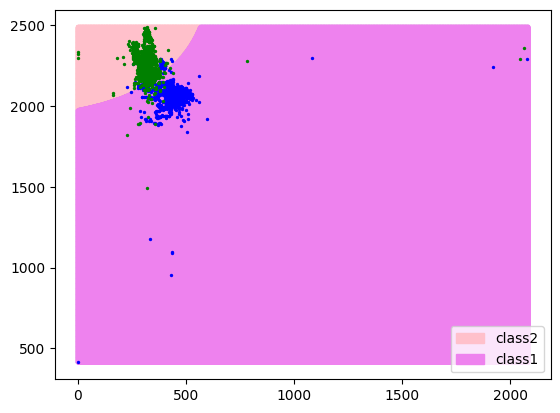

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[349. 339.]
 [ 28. 689.]]
Accuracy:  [0.73879004 0.73879004]
Precision:  [0.92572944 0.67023346]
Recall:  [0.50726744 0.9609484 ]
F-Measure:  [0.65539906 0.78968481]
Mean F-Measure:  0.7225419373931603


100% (2085 of 2085) |####################| Elapsed Time: 0:12:19 Time:  0:12:19


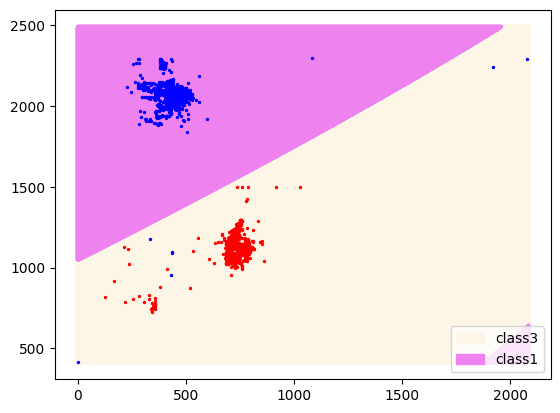

  0% (0 of 2085) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Confusion Matrix
[[670.  18.]
 [  1. 649.]]
Accuracy:  [0.9857997 0.9857997]
Precision:  [0.99850969 0.97301349]
Recall:  [0.97383721 0.99846154]
F-Measure:  [0.98601913 0.98557327]
Mean F-Measure:  0.9857962021517116


100% (2085 of 2085) |####################| Elapsed Time: 0:12:30 Time:  0:12:30


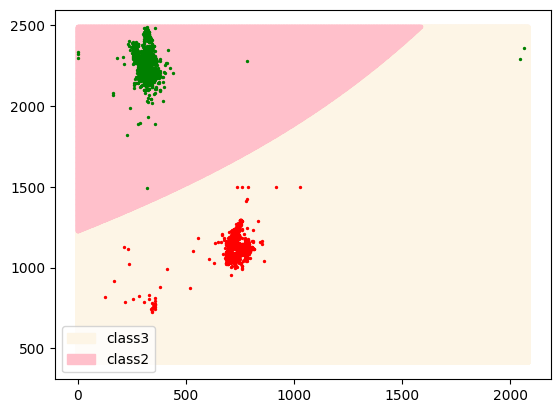

Confusion Matrix
[[702.  15.]
 [  1. 649.]]
Accuracy:  [0.98829554 0.98829554]
Precision:  [0.99857752 0.97740964]
Recall:  [0.9790795  0.99846154]
F-Measure:  [0.98873239 0.98782344]
Mean F-Measure:  0.9882779171220727


In [ ]:
#Case4: When all class have different covariance matrix

pair_plot(data_class1, data_class2, cov1, cov2, mean1, mean2,1,2)
pair_plot(data_class1, data_class3, cov1, cov3, mean1, mean3,1,3)
pair_plot(data_class2, data_class3, cov2, cov3, mean2, mean3,2,3)

total_plot(cov1, cov2, cov3, mean1, mean2, mean3)

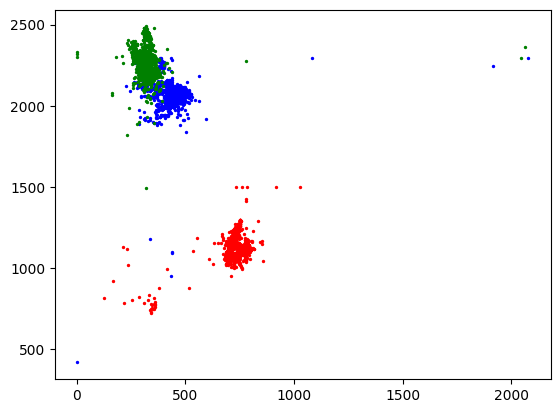

In [19]:
minx , miny, maxx, maxy = find_range(data_class1, data_class2, data_class3)
plt.scatter(data_class1[:,0], data_class1[:,1], s=2, c='blue')
plt.scatter(data_class2[:,0], data_class2[:,1], s=2, c='green')
plt.scatter(data_class3[:,0], data_class3[:,1], s=2, c='red')
plt.show()

import pandas as pd
df1 = pd.DataFrame(data_class1, columns=["x", "y"])
df2 = pd.DataFrame(data_class2, columns=["x", "y"])
df3 = pd.DataFrame(data_class3, columns=["x", "y"])



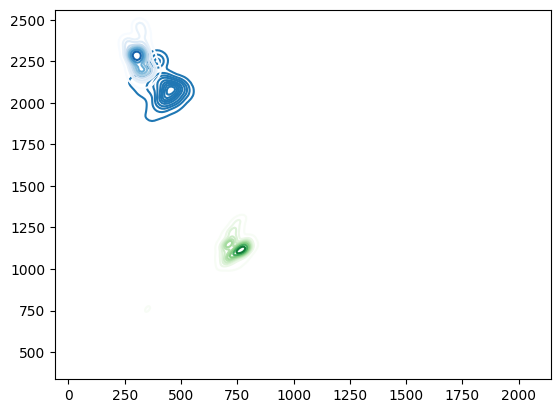

In [22]:
fig, ax = plt.subplots()
sns.kdeplot(x=data_class1[:, 0], y=data_class1[:, 1], ax=ax)
sns.kdeplot(x=data_class2[:, 0], y=data_class2[:, 1], ax=ax, cmap="Blues", fill=False, thresh=0.05)
sns.kdeplot(x=data_class3[:, 0], y=data_class3[:, 1], ax=ax, cmap="Greens", fill=False, thresh=0.05)

plt.show()
